# SER - Exploratory Data Analysis

In [ ]:
# built-in imports
import sys
import os
# src imports
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)
from src.utils import load_affectnet, load_ck, load_fer2013, load_rafbd, filter_emotions, load_iemocap
# 
import numpy as np
import pandas as pd

affect = filter_emotions(load_affectnet()) #load_affectnet()
ck = filter_emotions(load_ck()) #load_ck()
ck['pixels'] = ck['pixels'].apply(lambda x: np.array([int(p) for p in x.split(" ")]).reshape(48,48))
fer = filter_emotions(load_fer2013()) #load_fer2013()
fer['pixels'] = fer['pixels'].apply(lambda x: np.array([int(p) for p in x.split(" ")]).reshape(48,48))
raf = filter_emotions(load_rafbd()) #load_rafbd()

affect['dataset'] = 'affectnet'
ck['dataset'] = 'ck+'
fer['dataset'] = 'fer2013'
raf['dataset'] = 'rafdb'



Dataset downloaded to: /Users/sofiafernandes/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1
Available folders: ['happy', 'Contempt', 'sad', 'fear', 'surprise', 'neutral', 'Anger', 'disgust']


100%|██████████| 8/8 [00:15<00:00,  1.89s/it]


Subfolders in the dataset: ['ckextended.csv']
Subfolders in the dataset: ['fer2013.csv']
First few rows of the dataframe:
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Subfolders: ['train_labels.csv', 'test_labels.csv', 'DATASET']
Subfolders in the dataset: ['7', '6', '1', '4', '3', '2', '5']


100%|██████████| 3068/3068 [00:02<00:00, 1320.41it/s]


In [12]:
iemocap = filter_emotions(load_iemocap())
iemocap.head()

Subfolders in the dataset: ['IEMOCAP_full_release']


session  method gender emotion  n_annotators  agreement  \
0        1  script      F     neu             3          3   
1        1  script      F     sur             3          2   
2        1  script      F     neu             3          2   
3        1  script      F     ang             3          2   
4        1  script      F     ang             3          2   

                                                path     label  \
0  Session1/sentences/wav/Ses01F_script02_1/Ses01...   neutral   
1  Session1/sentences/wav/Ses01F_script02_1/Ses01...  surprise   
2  Session1/sentences/wav/Ses01F_script02_1/Ses01...   neutral   
3  Session1/sentences/wav/Ses01F_script02_1/Ses01...     angry   
4  Session1/sentences/wav/Ses01F_script02_1/Ses01...     angry   

                                            filename  
0  /Users/sofiafernandes/.cache/kagglehub/dataset...  
1  /Users/sofiafernandes/.cache/kagglehub/dataset...  
2  /Users/sofiafernandes/.cache/kagglehub/dataset...  
3  /Users/sofiafernandes/.cache/kagglehub/dataset...  
4  /Users/sofiafernandes/.cache/kagglehub/dataset...

In [ ]:
raf.head()

Empty DataFrame
Columns: [image, label, emo, pixels, dataset]
Index: []

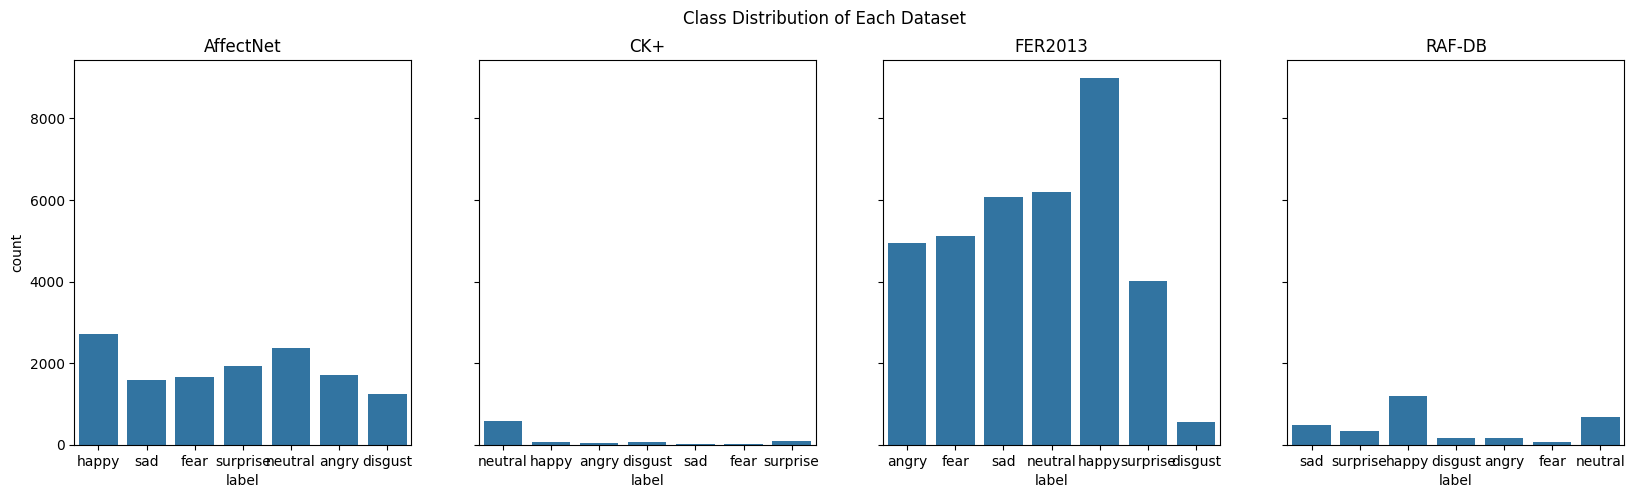

In [16]:
# plot class distribution of each dataset in a row of 4 subplots
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.countplot(x='label', data=affect, ax=axes[0])
axes[0].set_title('AffectNet')
sns.countplot(x='label', data=ck, ax=axes[1])
axes[1].set_title('CK+')
sns.countplot(x='label', data=fer, ax=axes[2])
axes[2].set_title('FER2013')
sns.countplot(x='label', data=raf, ax=axes[3])
axes[3].set_title('RAF-DB')
plt.suptitle('Class Distribution of Each Dataset')
plt.savefig('countplot_fer.png')
plt.show()


error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


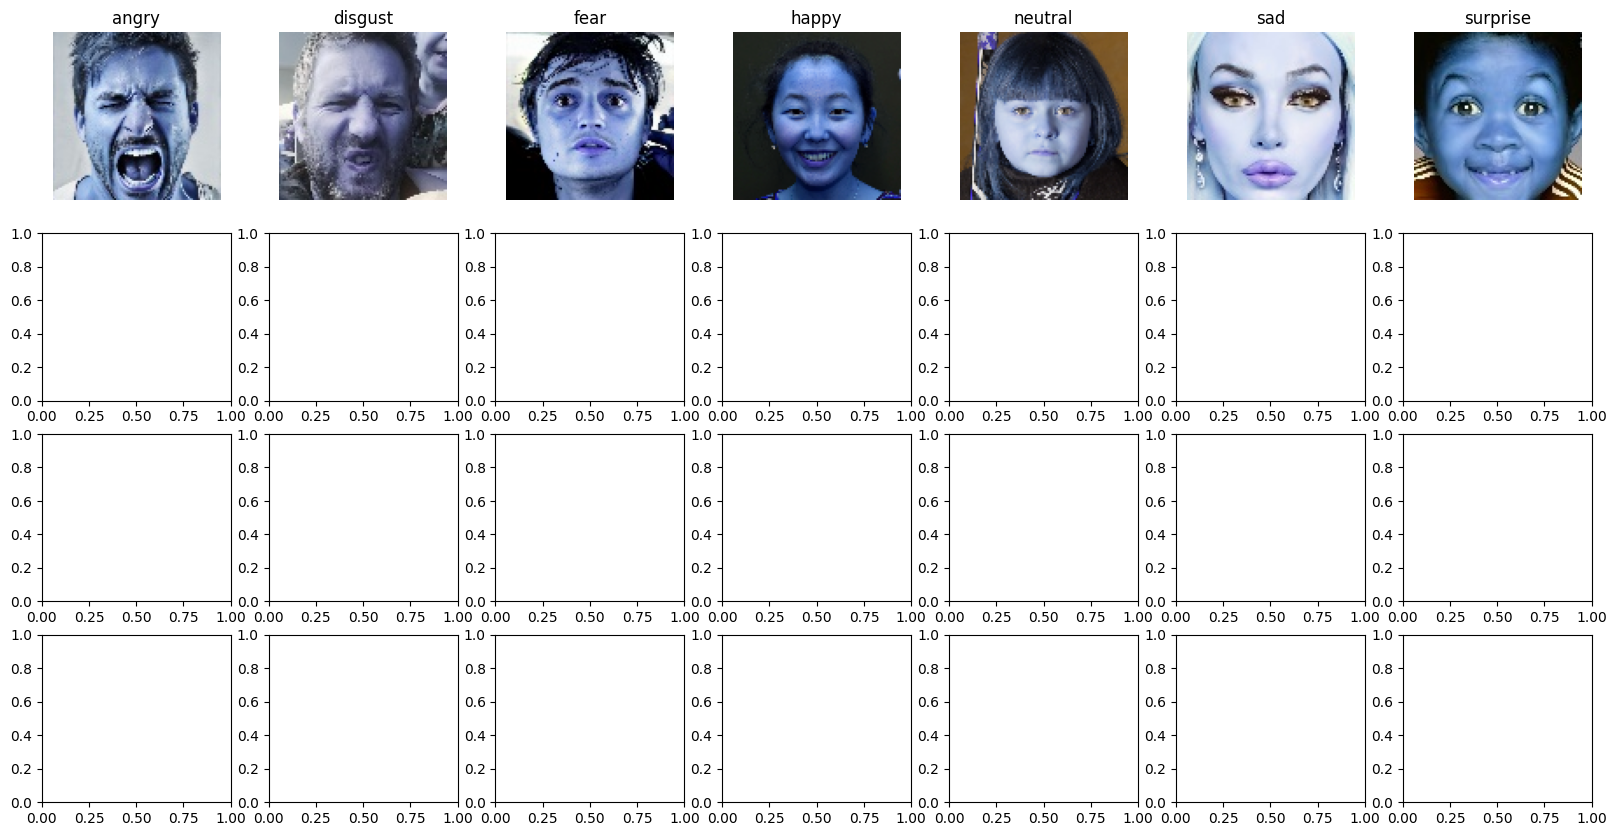

In [30]:
import cv2
# plot an image from each dataset, for each emotion
fig, axes = plt.subplots(4, 7, figsize=(20, 10))
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
datasets = [affect, ck, fer, raf]   
for i, dataset in enumerate(datasets):
    for j, emotion in enumerate(emotions):
        img = dataset[dataset['label'] == emotion].sample(1)['pixels'].values[0]
        # Handle grayscale
        if len(img.shape) == 2:  # grayscale (48x48)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # convert to 3-channel RGB
        elif len(img.shape) == 3 and img.shape[2] == 3:  # already color
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR → RGB
        axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title(emotion)
        if j == 0:
            if i == 0:
                axes[i, j].set_ylabel('AffectNet')
            elif i == 1:
                axes[i, j].set_ylabel('CK+')
            elif i == 2:
                axes[i, j].set_ylabel('FER2013')
            elif i == 3:
                axes[i, j].set_ylabel('RAF-DB')
plt.suptitle('Sample Images from Each Dataset for Each Emotion')
plt.savefig('sample_images_fer.png')
plt.show()

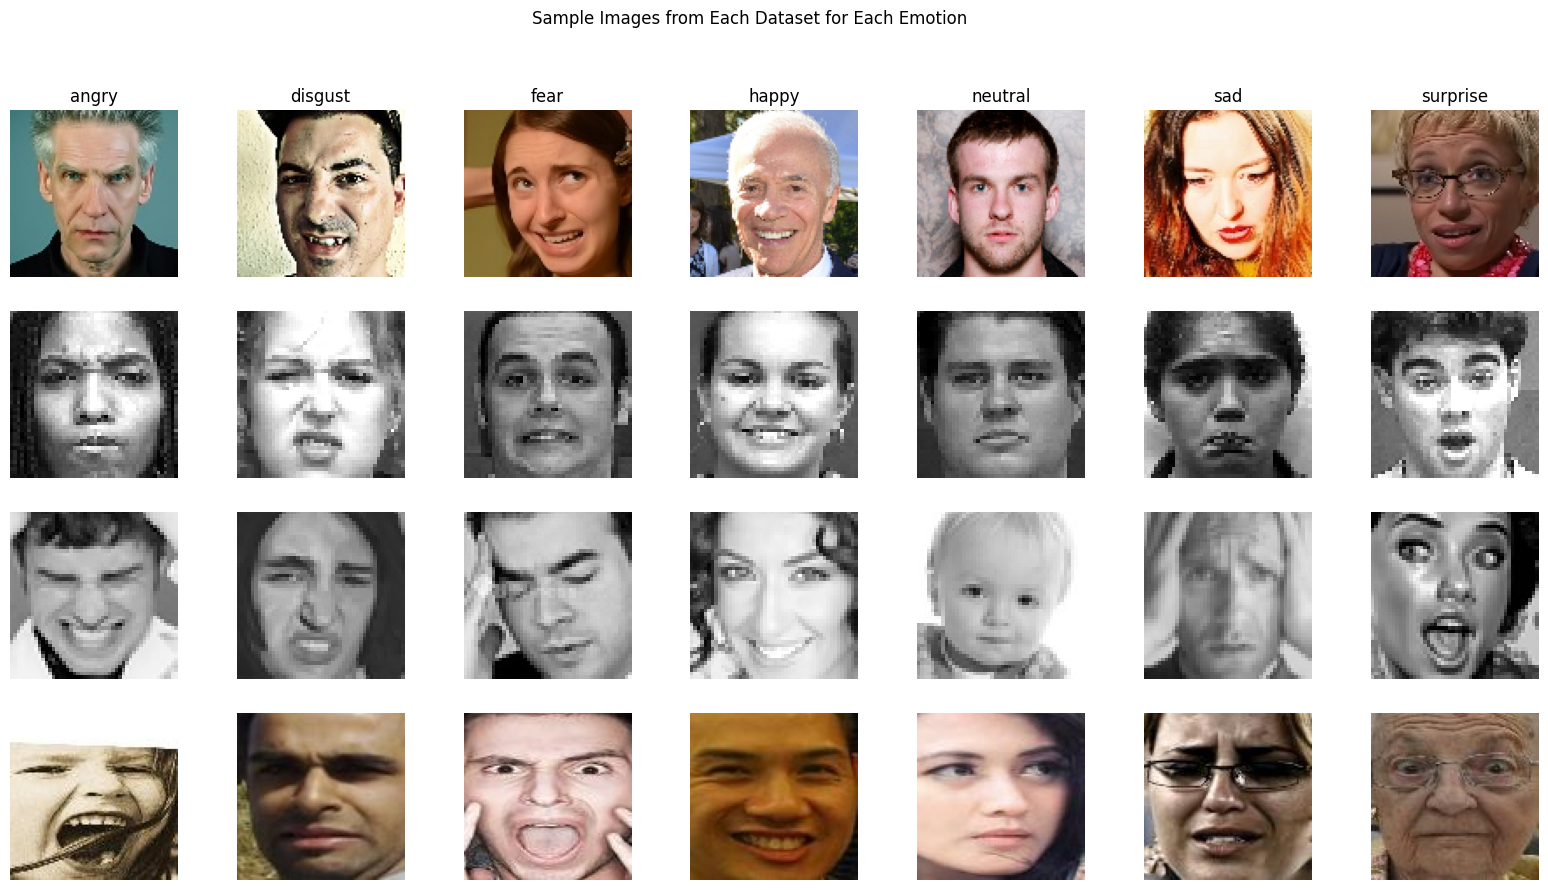

In [34]:
# plot an image from each dataset, for each emotion
fig, axes = plt.subplots(4, 7, figsize=(20, 10))
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
datasets = [affect, ck, fer, raf]   

for i, dataset in enumerate(datasets):
    for j, emotion in enumerate(emotions):
        img = dataset[dataset['label'] == emotion].sample(1)['pixels'].values[0]

        # Ensure uint8
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
        # Reshape if flat
        if len(img.shape) == 1:  
            side = int(np.sqrt(img.shape[0]))   # e.g. 48x48 for FER/CK+
            img = img.reshape(side, side)
        # Handle grayscale
        if len(img.shape) == 2:  # grayscale (48x48)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # convert to 3-channel RGB
        #elif len(img.shape) == 3 and img.shape[2] == 3:  # already color
        elif dataset is affect:  # AffectNet is already color
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR → RGB
        elif dataset is raf:  # RAF-DB is already RGB color
            img = img

        axes[i, j].imshow(img)
        axes[i, j].axis('off')

        if i == 0:
            axes[i, j].set_title(emotion, fontsize=12)
        if j == 0:
            if i == 0:
                axes[i, j].set_ylabel('AffectNet')
            elif i == 1:
                axes[i, j].set_ylabel('CK+')
            elif i == 2:
                axes[i, j].set_ylabel('FER2013')
            elif i == 3:
                axes[i, j].set_ylabel('RAF-DB')

plt.suptitle('Sample Images from Each Dataset for Each Emotion')
plt.savefig('sample_images_fer.png')
plt.show()


4it [00:07,  1.76s/it]


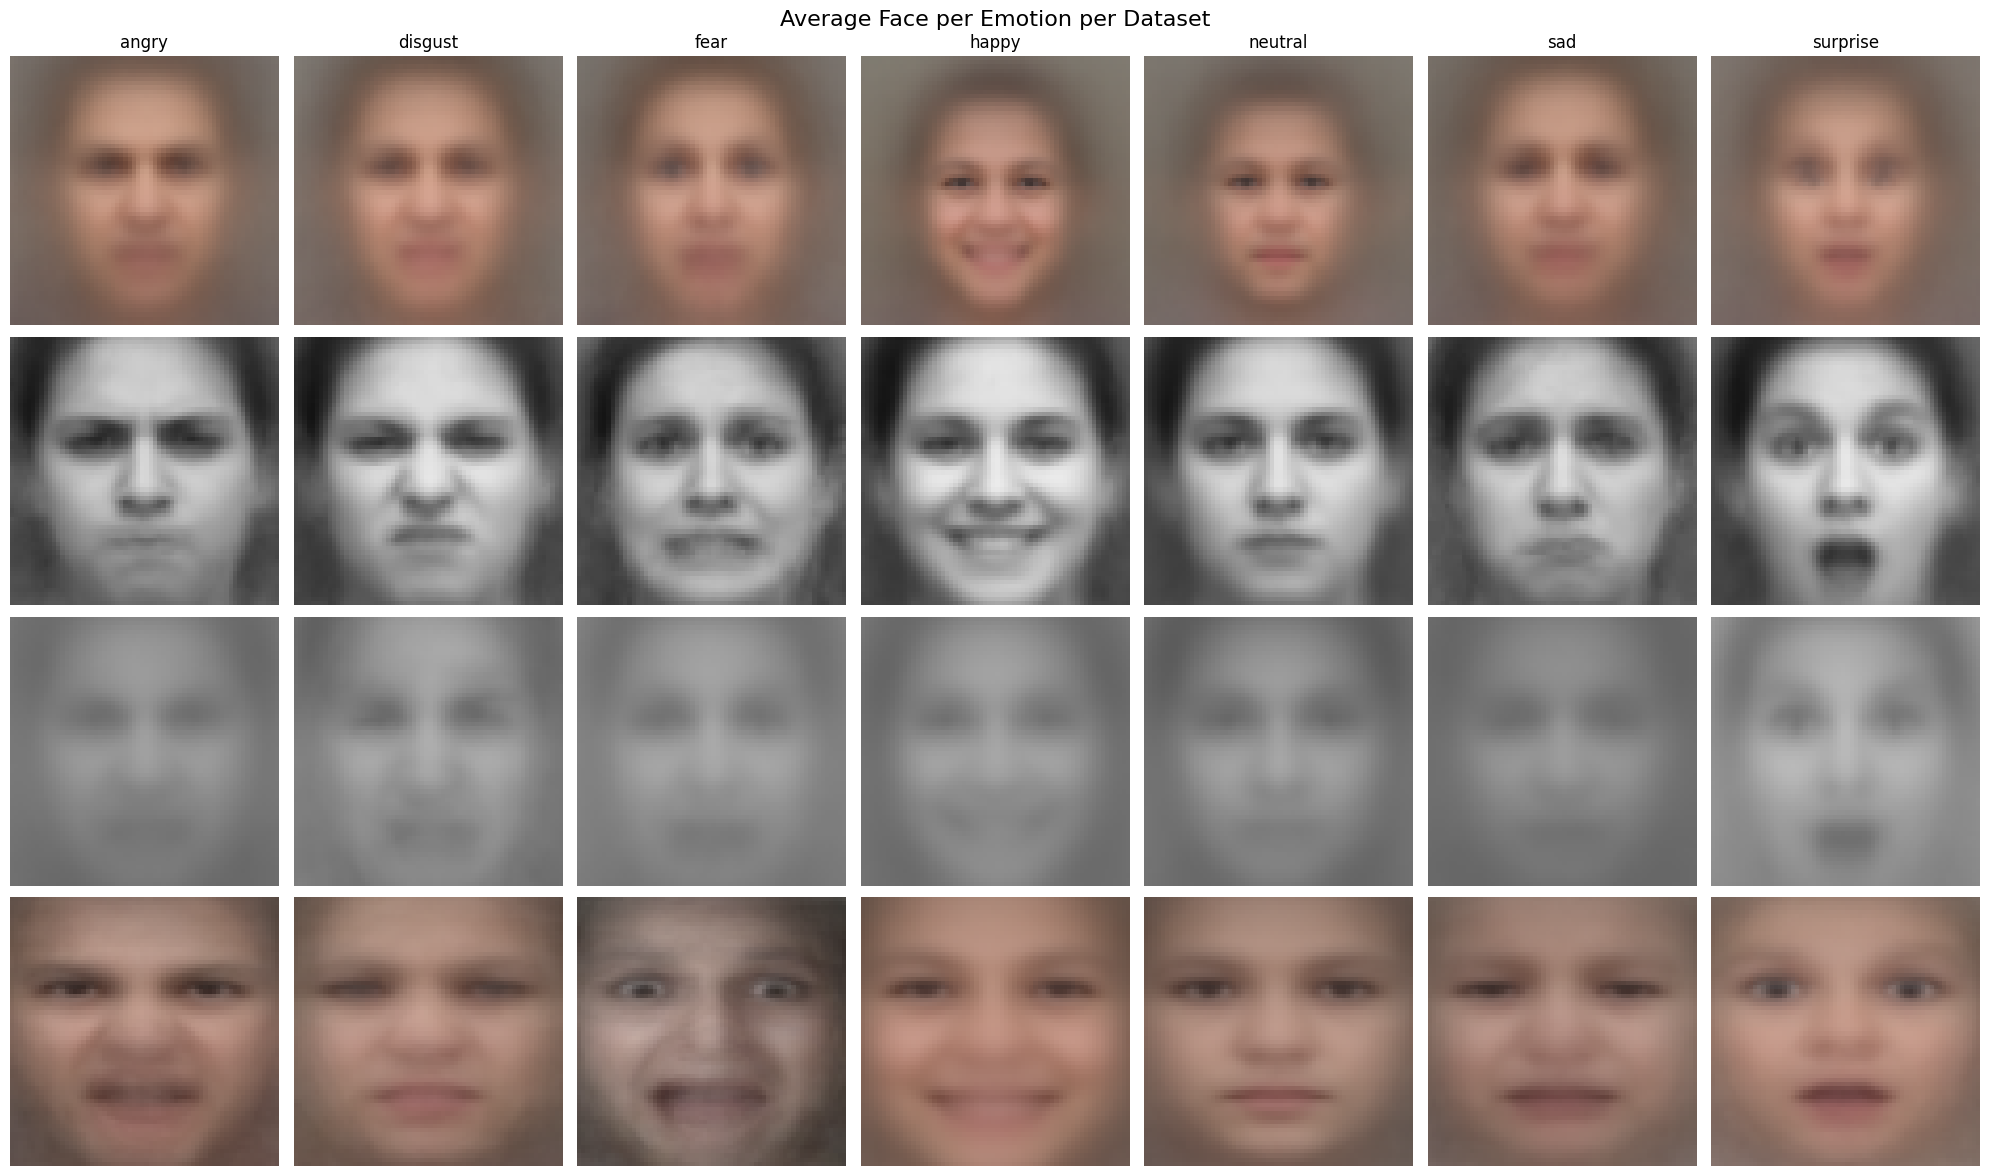

In [67]:
from tqdm import tqdm
tqdm.pandas()
# plot average image for each emotion per dataset (rows = datasets, cols = emotions)
fig, axes = plt.subplots(len([affect, ck, fer, raf]), 7, figsize=(20, 12))
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
datasets = [affect, ck, fer, raf]
dataset_names = ['AffectNet', 'CK+', 'FER2013', 'RAF-DB']

target_size = (64, 64)  # common size for averaging

for i, dataset in tqdm(enumerate(datasets)):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values
        
        processed_imgs = []
        for img in imgs:
            # Convert to uint8
            if img.dtype != np.uint8:
                img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)

            # Reshape if flat
            if len(img.shape) == 1:
                side = int(np.sqrt(img.shape[0]))  # e.g. 48x48
                img = img.reshape(side, side)

            # Handle grayscale
            if len(img.shape) == 2:  # grayscale (48x48)
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # convert to 3-channel RGB
            #elif len(img.shape) == 3 and img.shape[2] == 3:  # already color
            elif dataset is affect:  # AffectNet is already color
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR → RGB
            elif dataset is raf:  # RAF-DB is already RGB color
                img = img

            # Resize to target size
            img = cv2.resize(img, target_size)

            processed_imgs.append(img.astype(np.float32))  # for averaging

        if processed_imgs:
            avg_img = np.mean(processed_imgs, axis=0)
            # error face from mean (difference from mean)
            #mean_face = np.mean(processed_imgs, axis=0)
            #diffs = [np.abs(img - mean_face) for img in processed_imgs]
            #std_diffs = [np.square(img - mean_face) for img in processed_imgs]
            #diffs = [np.sqrt(np.mean(d, axis=-1)) for d in std_diffs]
            #avg_img = np.mean(diffs, axis=0)
            axes[i, j].imshow(avg_img.astype(np.uint8))
        else:
            axes[i, j].imshow(np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8))  # empty placeholder

        axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title(emotions[j], fontsize=12)
    axes[i, 0].set_ylabel(dataset_names[i], fontsize=12)

plt.suptitle("Average Face per Emotion per Dataset", fontsize=16)
plt.tight_layout()
plt.savefig('average_faces_fer.png')
plt.show()


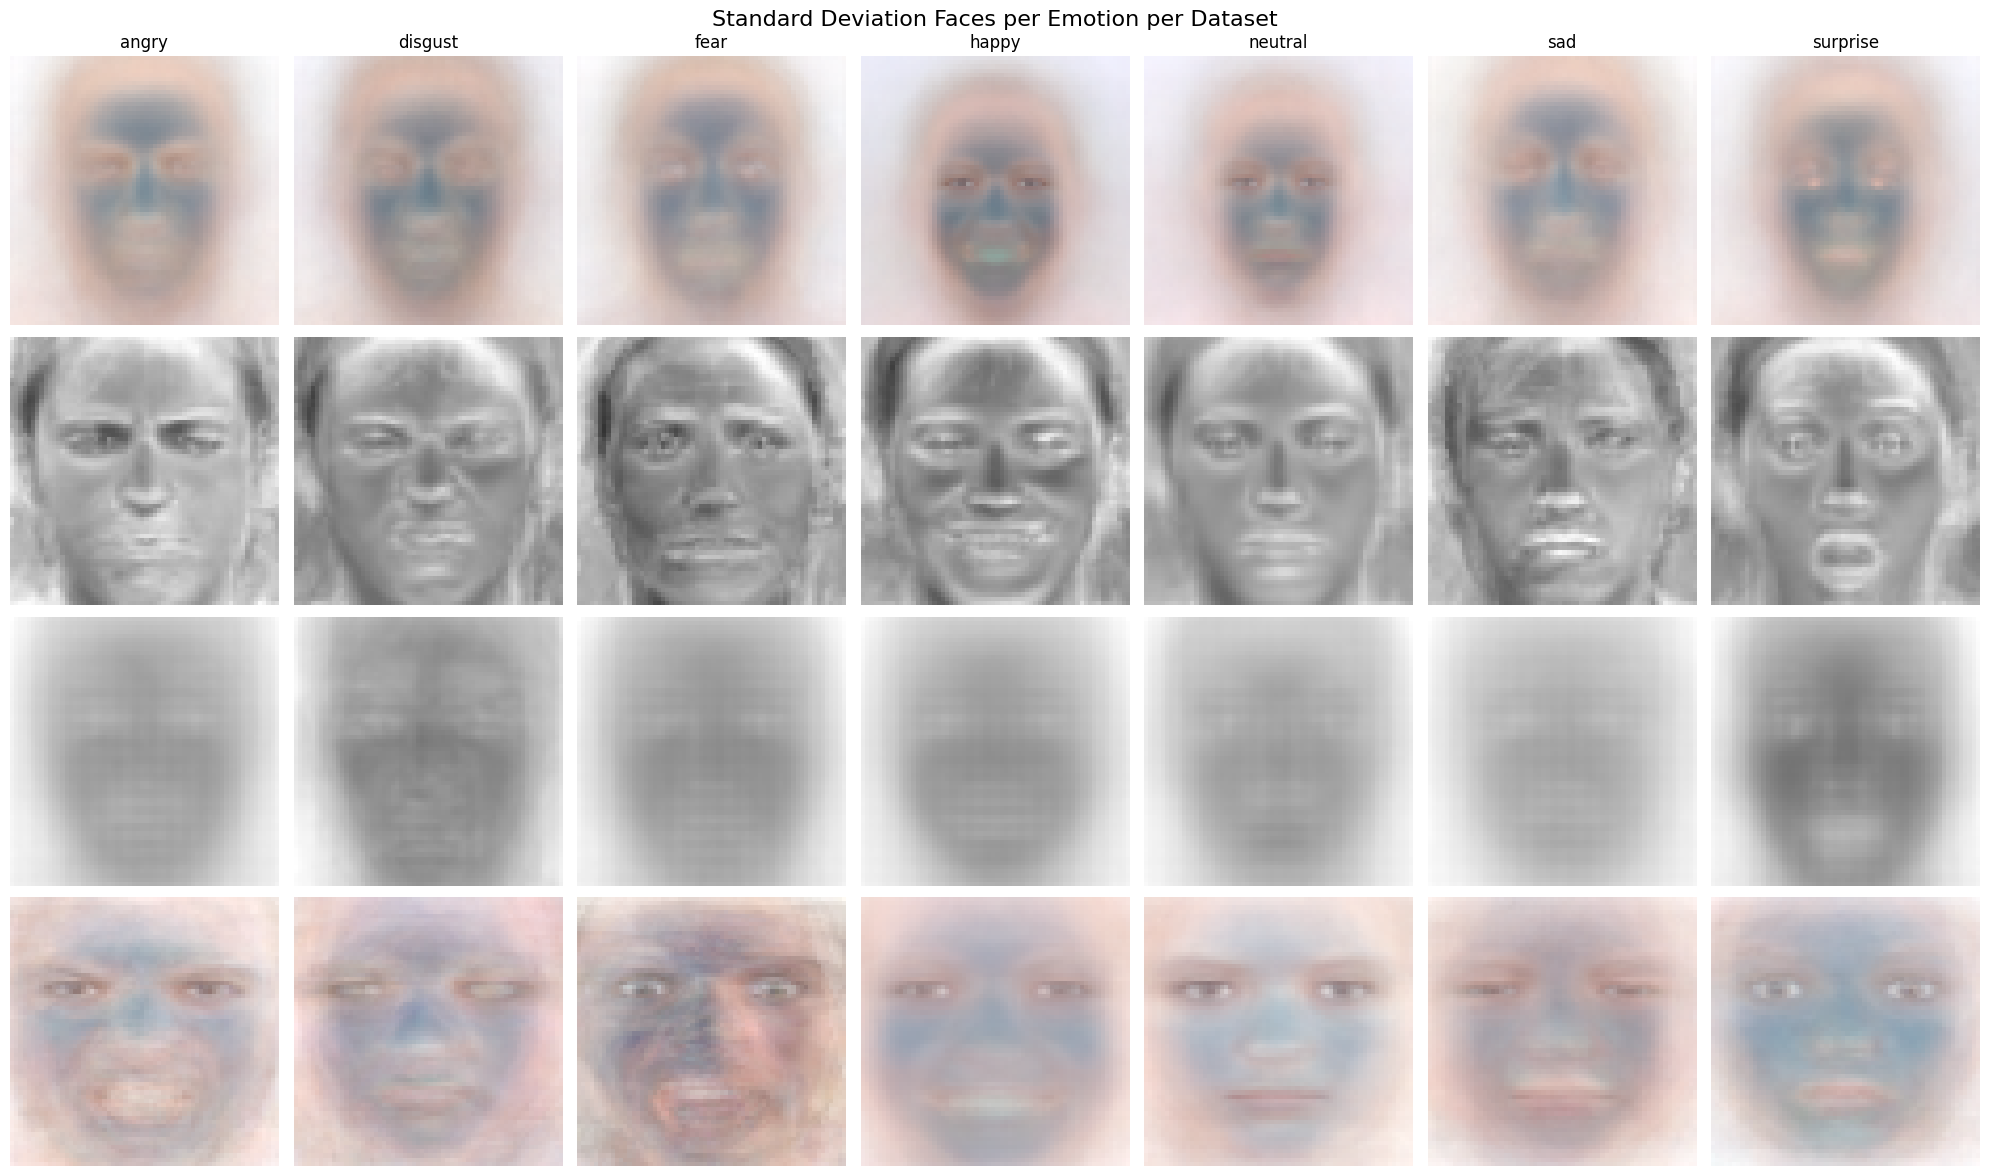

In [53]:
# plot standard deviation image for each emotion per dataset
fig, axes = plt.subplots(len(datasets), len(emotions), figsize=(20, 12))

for i, dataset in enumerate(datasets):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values
        processed_imgs = []
        
        for img in imgs:
            if img.dtype != np.uint8:
                img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
            if len(img.shape) == 1:  # flat vector
                side = int(np.sqrt(img.shape[0]))
                img = img.reshape(side, side)
            if len(img.shape) == 2:  # grayscale
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            elif dataset is affect:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            processed_imgs.append(img.astype(np.float32))

        if processed_imgs:
            std_img = np.std(processed_imgs, axis=0)
            std_img = (std_img / std_img.max() * 255).astype(np.uint8)  # normalize for visibility
            axes[i, j].imshow(std_img)
        else:
            axes[i, j].imshow(np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8))

        axes[i, j].axis("off")
        if i == 0:
            axes[i, j].set_title(emotions[j])
    axes[i, 0].set_ylabel(dataset_names[i], fontsize=12)

plt.suptitle("Standard Deviation Faces per Emotion per Dataset", fontsize=16)
plt.tight_layout()
plt.savefig('std_faces_fer.png')
plt.show()


4it [00:07,  1.95s/it]


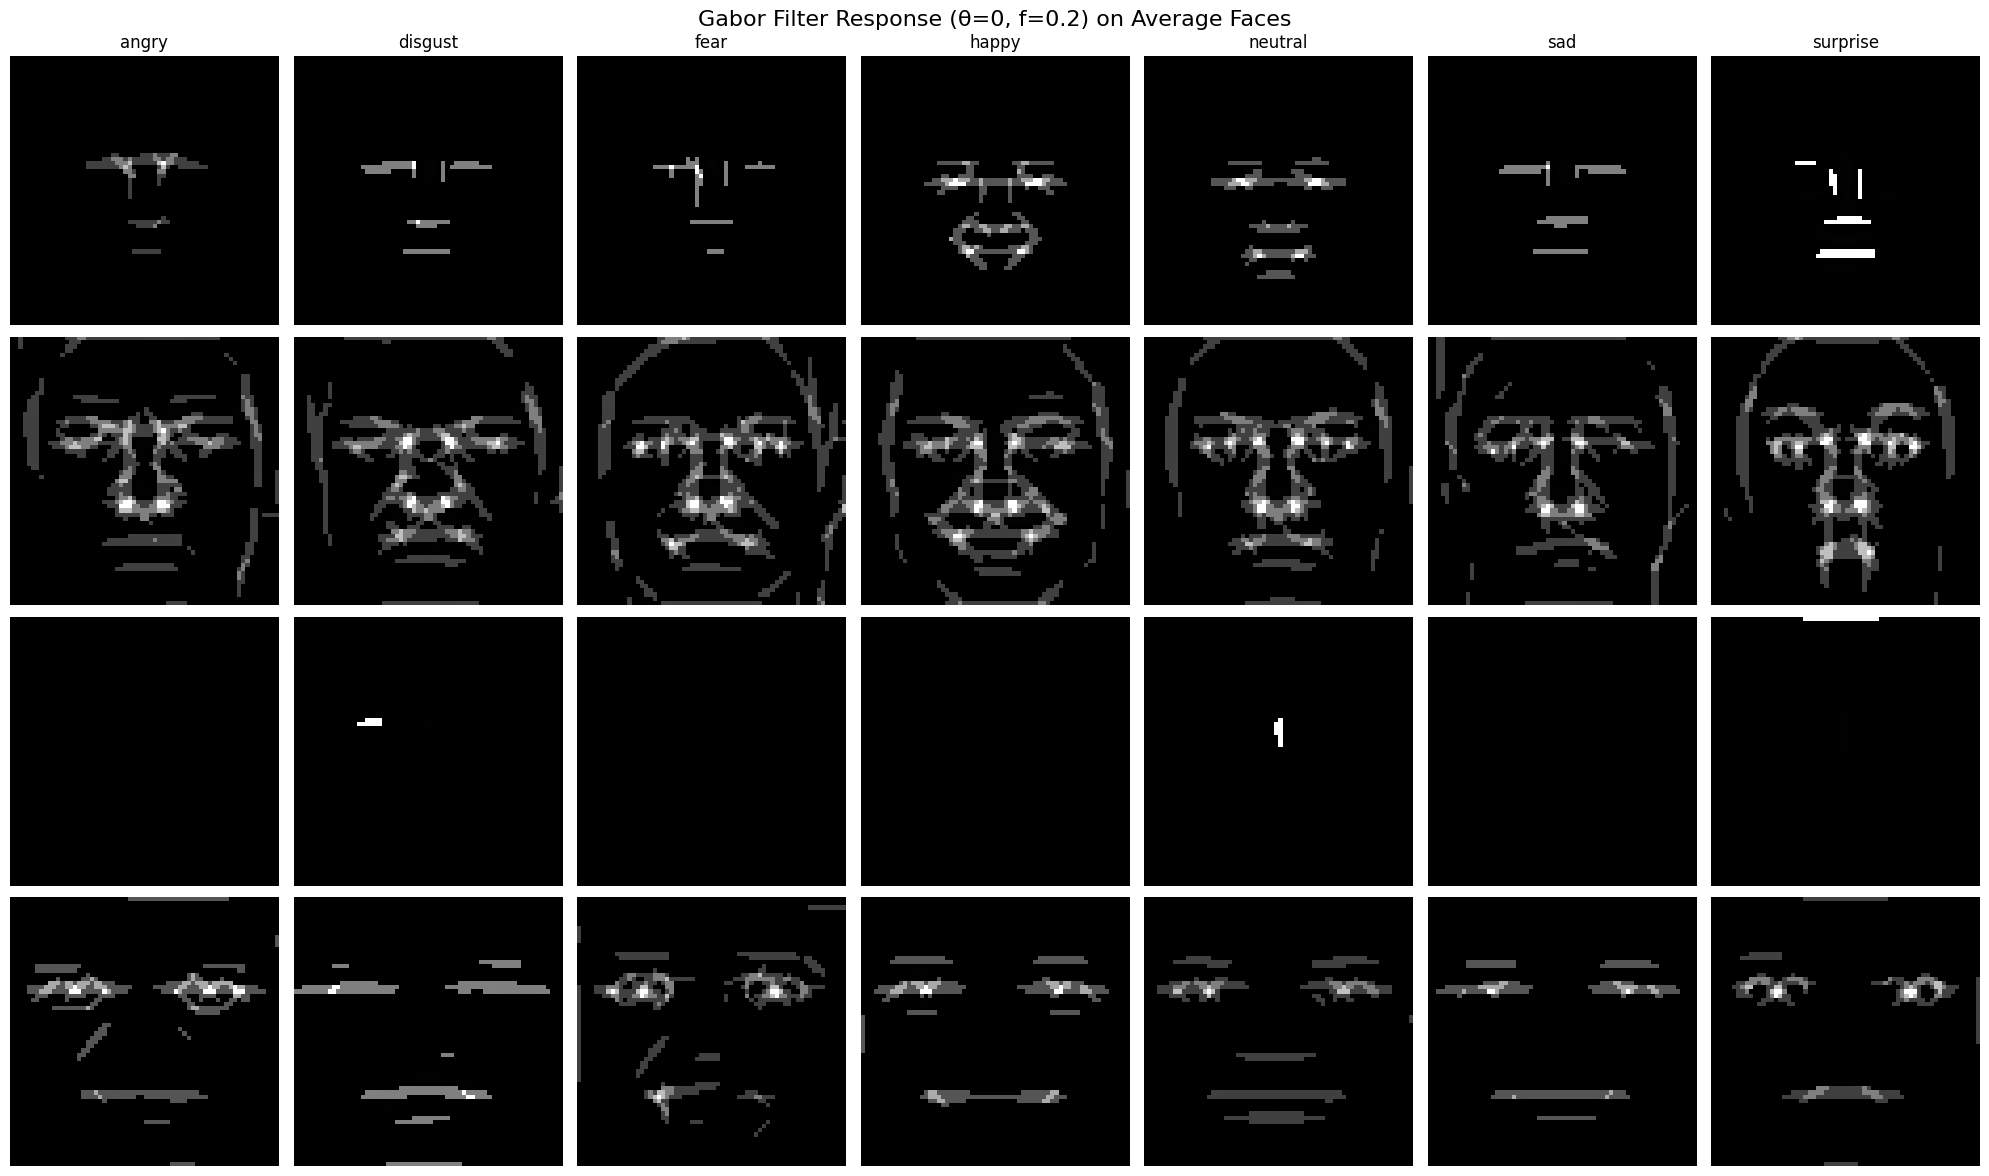

In [51]:
from skimage.filters import gabor

# Parameters for Gabor (you can vary frequency and theta to create a filter bank)
frequency = 0.2   # spatial frequency, try 0.1–0.4
theta = 0         # orientation (radians), try 0, π/4, π/2, etc.

fig, axes = plt.subplots(len(datasets), len(emotions), figsize=(20, 12))
for i, dataset in tqdm(enumerate(datasets)):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values

        processed_imgs = []
        for img in imgs:
            if img.dtype != np.uint8:
                img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
            if len(img.shape) == 1:
                side = int(np.sqrt(img.shape[0]))
                img = img.reshape(side, side)
            if len(img.shape) == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            elif dataset is affect:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            elif dataset is raf:
                img = img
            img = cv2.resize(img, target_size)
            processed_imgs.append(img.astype(np.float32))

        if processed_imgs:
            avg_img = np.mean(processed_imgs, axis=0).astype(np.uint8)
            gray_avg = cv2.cvtColor(avg_img, cv2.COLOR_RGB2GRAY)

            orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
            frequency = 0.2 #0.2
            responses = [gabor(gray_avg, frequency=frequency, theta=theta)[0] for theta in orientations]

            gabor_response = np.sum(np.array(responses), axis=0)
            #gabor_response = (gabor_response - gabor_response.min()) / (gabor_response.max() - gabor_response.min())
            eps = 1e-8  # small value to avoid division by zero
            gabor_response = (gabor_response - gabor_response.min()) / (gabor_response.max() - gabor_response.min() + eps)

            axes[i, j].imshow(gabor_response, cmap='gray')
        else:
            axes[i, j].imshow(np.zeros(target_size, dtype=np.uint8), cmap="gray")

        axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title(emotions[j], fontsize=12)
    axes[i, 0].set_ylabel(dataset_names[i], fontsize=12)

plt.suptitle("Gabor Filter Response (θ=0, f=0.2) on Average Faces", fontsize=16)
plt.tight_layout()
plt.savefig("gabor_avg_faces.png")
plt.show()


4it [00:03,  1.13it/s]


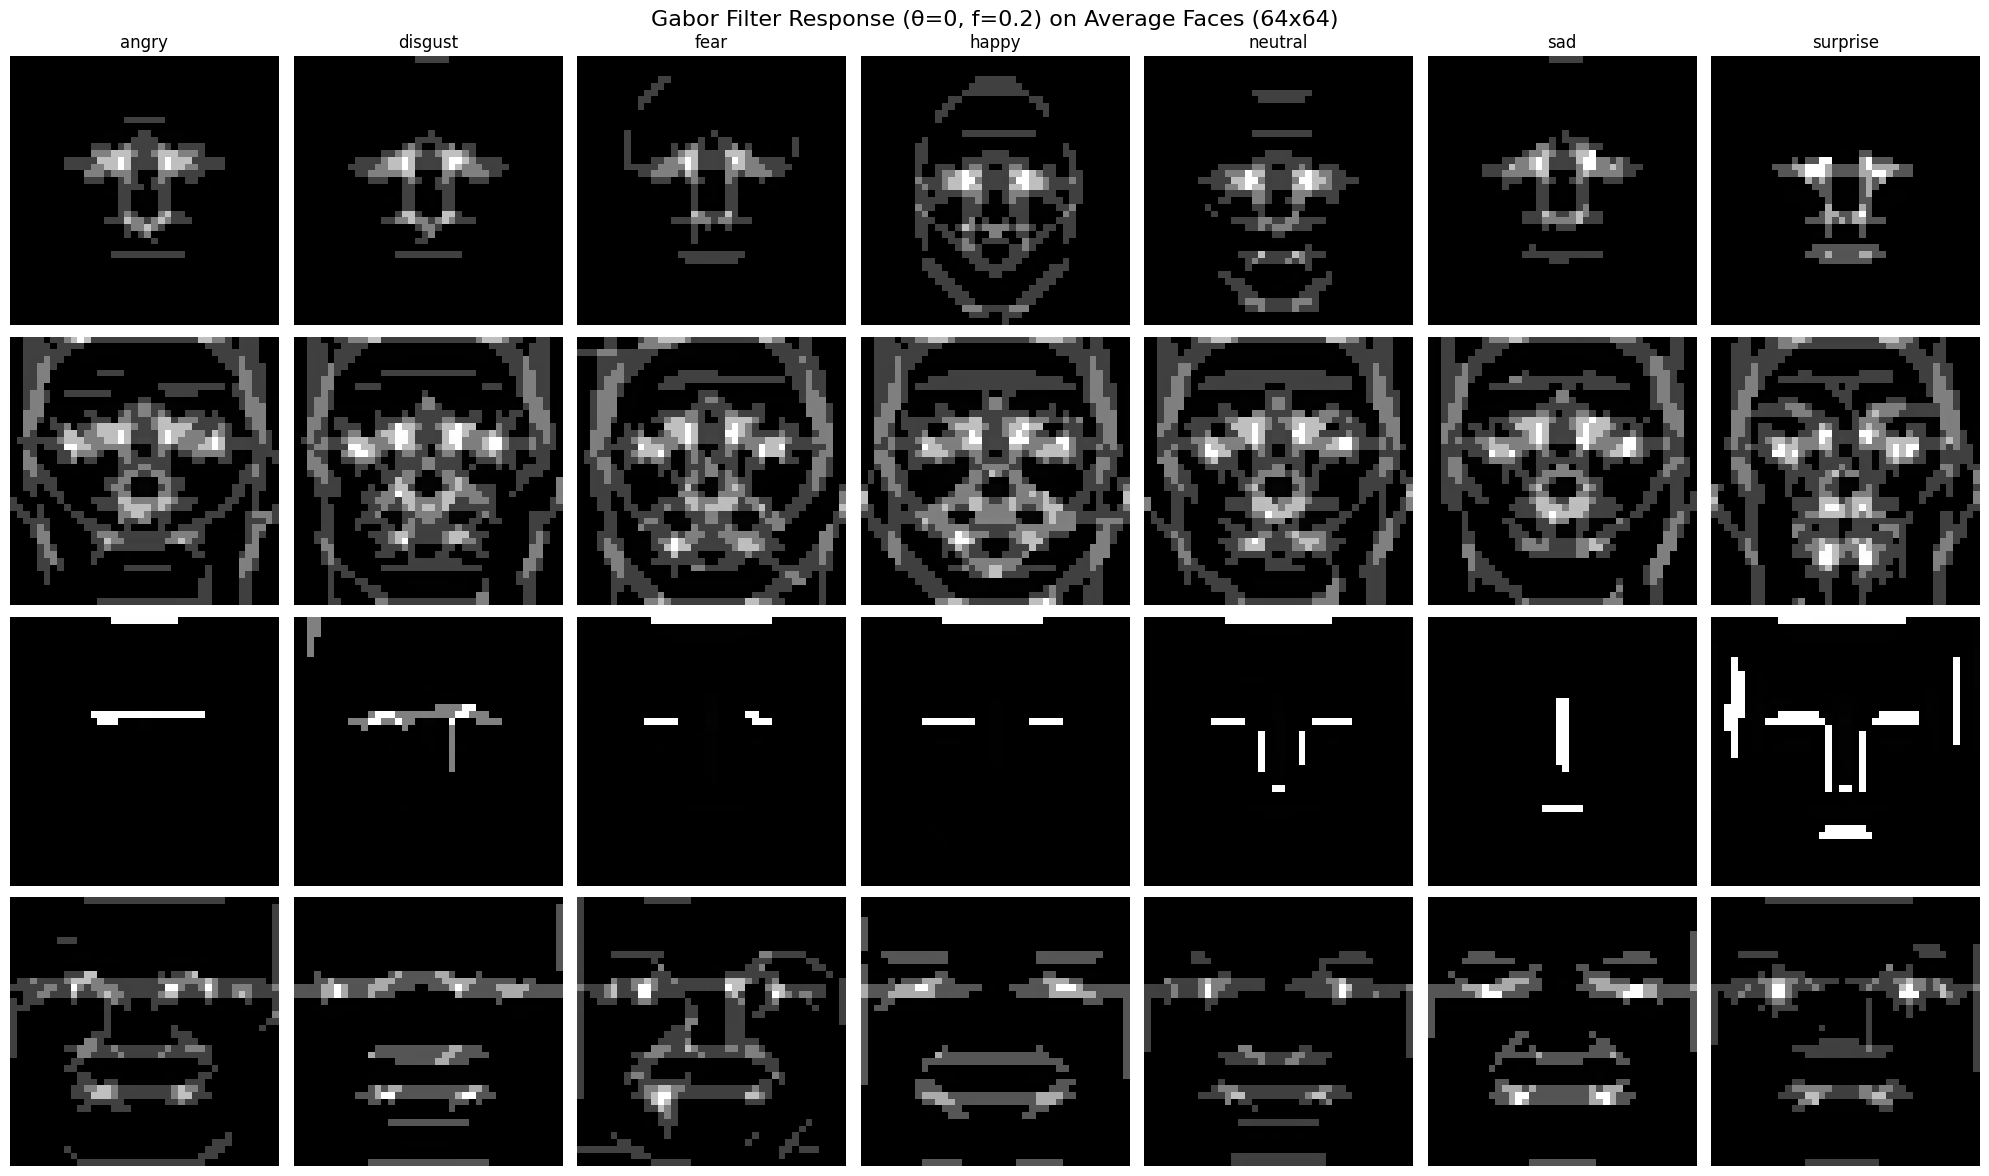

In [62]:
from skimage.filters import gabor
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fixed target size
target_size = (40, 40)

# Parameters for Gabor
frequency = 0.2
orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]

fig, axes = plt.subplots(len(datasets), len(emotions), figsize=(20, 12))

for i, dataset in tqdm(enumerate(datasets)):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values

        processed_imgs = []
        for img in imgs:
            # Convert to uint8
            if img.dtype != np.uint8:
                img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
            # Reshape if flat
            if len(img.shape) == 1:
                side = int(np.sqrt(img.shape[0]))
                img = img.reshape(side, side)
            # Convert grayscale to RGB
            if len(img.shape) == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            elif dataset is affect:  # AffectNet is BGR
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            elif dataset is raf:     # RAF-DB already RGB
                img = img
            # Resize to fixed target size
            img = cv2.resize(img, target_size)
            processed_imgs.append(img.astype(np.float32))

        if processed_imgs:
            avg_img = np.mean(processed_imgs, axis=0).astype(np.uint8)
            gray_avg = cv2.cvtColor(avg_img, cv2.COLOR_RGB2GRAY)

            responses = [gabor(gray_avg, frequency=frequency, theta=theta)[0] for theta in orientations]
            gabor_response = np.sum(np.array(responses), axis=0)

            # Normalize
            eps = 1e-8
            gabor_response = (gabor_response - gabor_response.min()) / (gabor_response.max() - gabor_response.min() + eps)

            axes[i, j].imshow(gabor_response, cmap='gray')
        else:
            axes[i, j].imshow(np.zeros(target_size, dtype=np.uint8), cmap="gray")

        axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title(emotions[j], fontsize=12)
    axes[i, 0].set_ylabel(dataset_names[i], fontsize=12)

plt.suptitle("Gabor Filter Response (θ=0, f=0.2) on Average Faces (64x64)", fontsize=16)
plt.tight_layout()
plt.savefig("gabor_avg_faces_64.png")
plt.show()


4it [00:07,  1.98s/it]


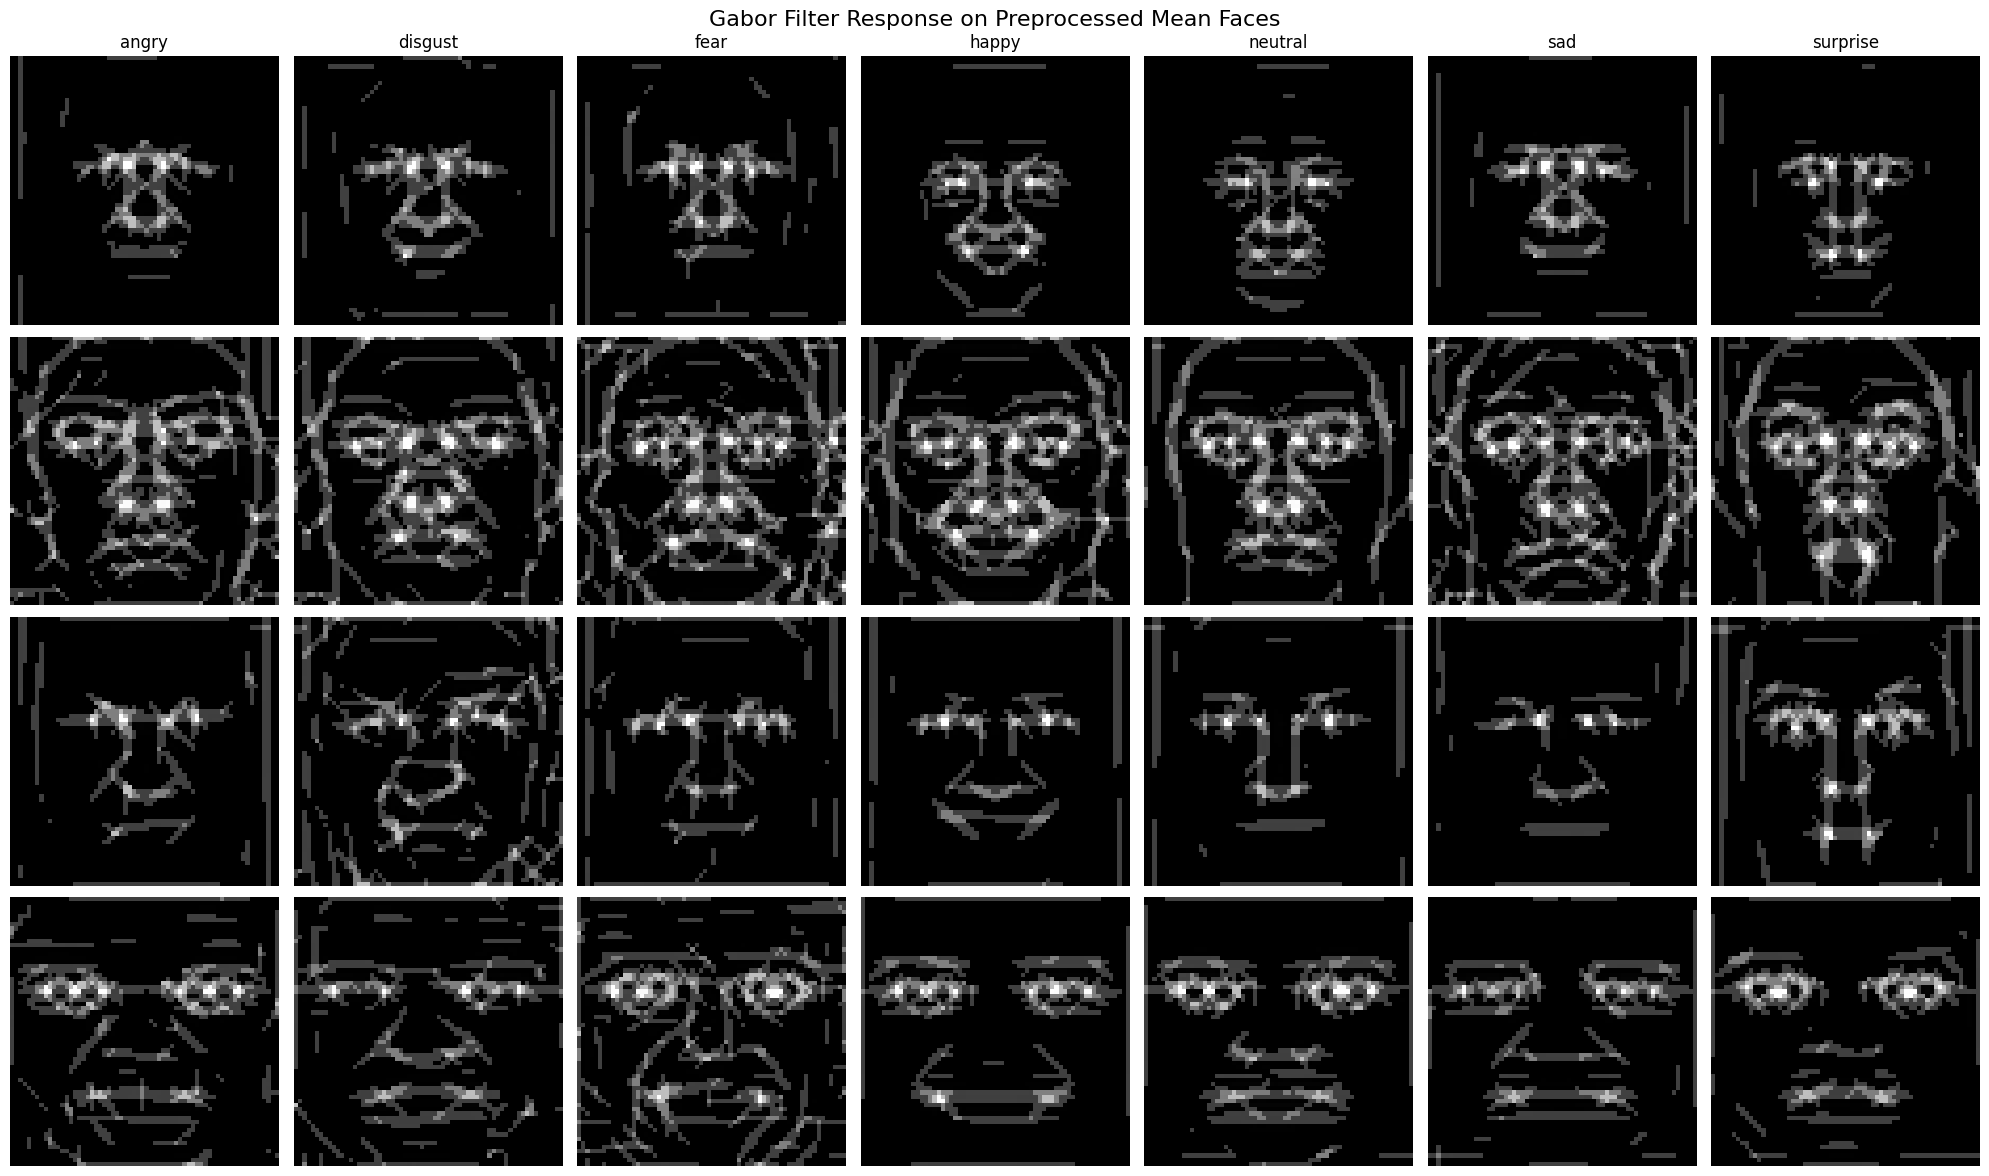

In [59]:
from skimage.filters import gabor
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Preprocessing function for computing average face
def preprocess_mean_face(imgs, target_size=(64,64), sharpen_method=None):
    processed_imgs = []
    for img in imgs:
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
        if len(img.shape) == 1:
            side = int(np.sqrt(img.shape[0]))
            img = img.reshape(side, side)
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        processed_imgs.append(img.astype(np.float32))
    
    if not processed_imgs:
        return np.zeros((target_size[0], target_size[1], 3), dtype=np.float32)
    
    avg_img = np.mean(processed_imgs, axis=0)

    # Optional sharpening
    if sharpen_method:
        if sharpen_method == 'unsharp':
            blur = cv2.GaussianBlur(avg_img, (3,3), 0)
            avg_img = cv2.addWeighted(avg_img, 1.5, blur, -0.5, 0)
        elif sharpen_method == 'kernel':
            kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
            avg_img = cv2.filter2D(avg_img, -1, kernel)
        elif sharpen_method == 'highpass':
            high_pass = avg_img - cv2.GaussianBlur(avg_img, (3,3), 0)
            avg_img = cv2.add(avg_img, high_pass)

    avg_img = (avg_img - avg_img.min()) / (avg_img.max() - avg_img.min() + 1e-8) * 255
    return avg_img.astype(np.uint8)

# Plot Gabor responses on preprocessed mean faces
fig, axes = plt.subplots(len(datasets), len(emotions), figsize=(20,12))
orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
frequency = 0.2  # Gabor frequency

for i, dataset in tqdm(enumerate(datasets)):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values
        avg_img = preprocess_mean_face(imgs, target_size=(64,64), sharpen_method='kernel')
        gray_avg = cv2.cvtColor(avg_img, cv2.COLOR_RGB2GRAY)

        # Compute Gabor responses for multiple orientations
        responses = [gabor(gray_avg, frequency=frequency, theta=theta)[0] for theta in orientations]
        gabor_response = np.sum(np.array(responses), axis=0)

        # Normalize
        gabor_response = (gabor_response - gabor_response.min()) / (gabor_response.max() - gabor_response.min() + 1e-8)
        axes[i,j].imshow(gabor_response, cmap='gray')
        axes[i,j].axis('off')
        if i == 0:
            axes[i,j].set_title(emotion)
    axes[i,0].set_ylabel(dataset_names[i])

plt.suptitle("Gabor Filter Response on Preprocessed Mean Faces", fontsize=16)
plt.tight_layout()
plt.savefig("gabor_kernel_mean_faces.png")
plt.show()


4it [00:08,  2.04s/it]


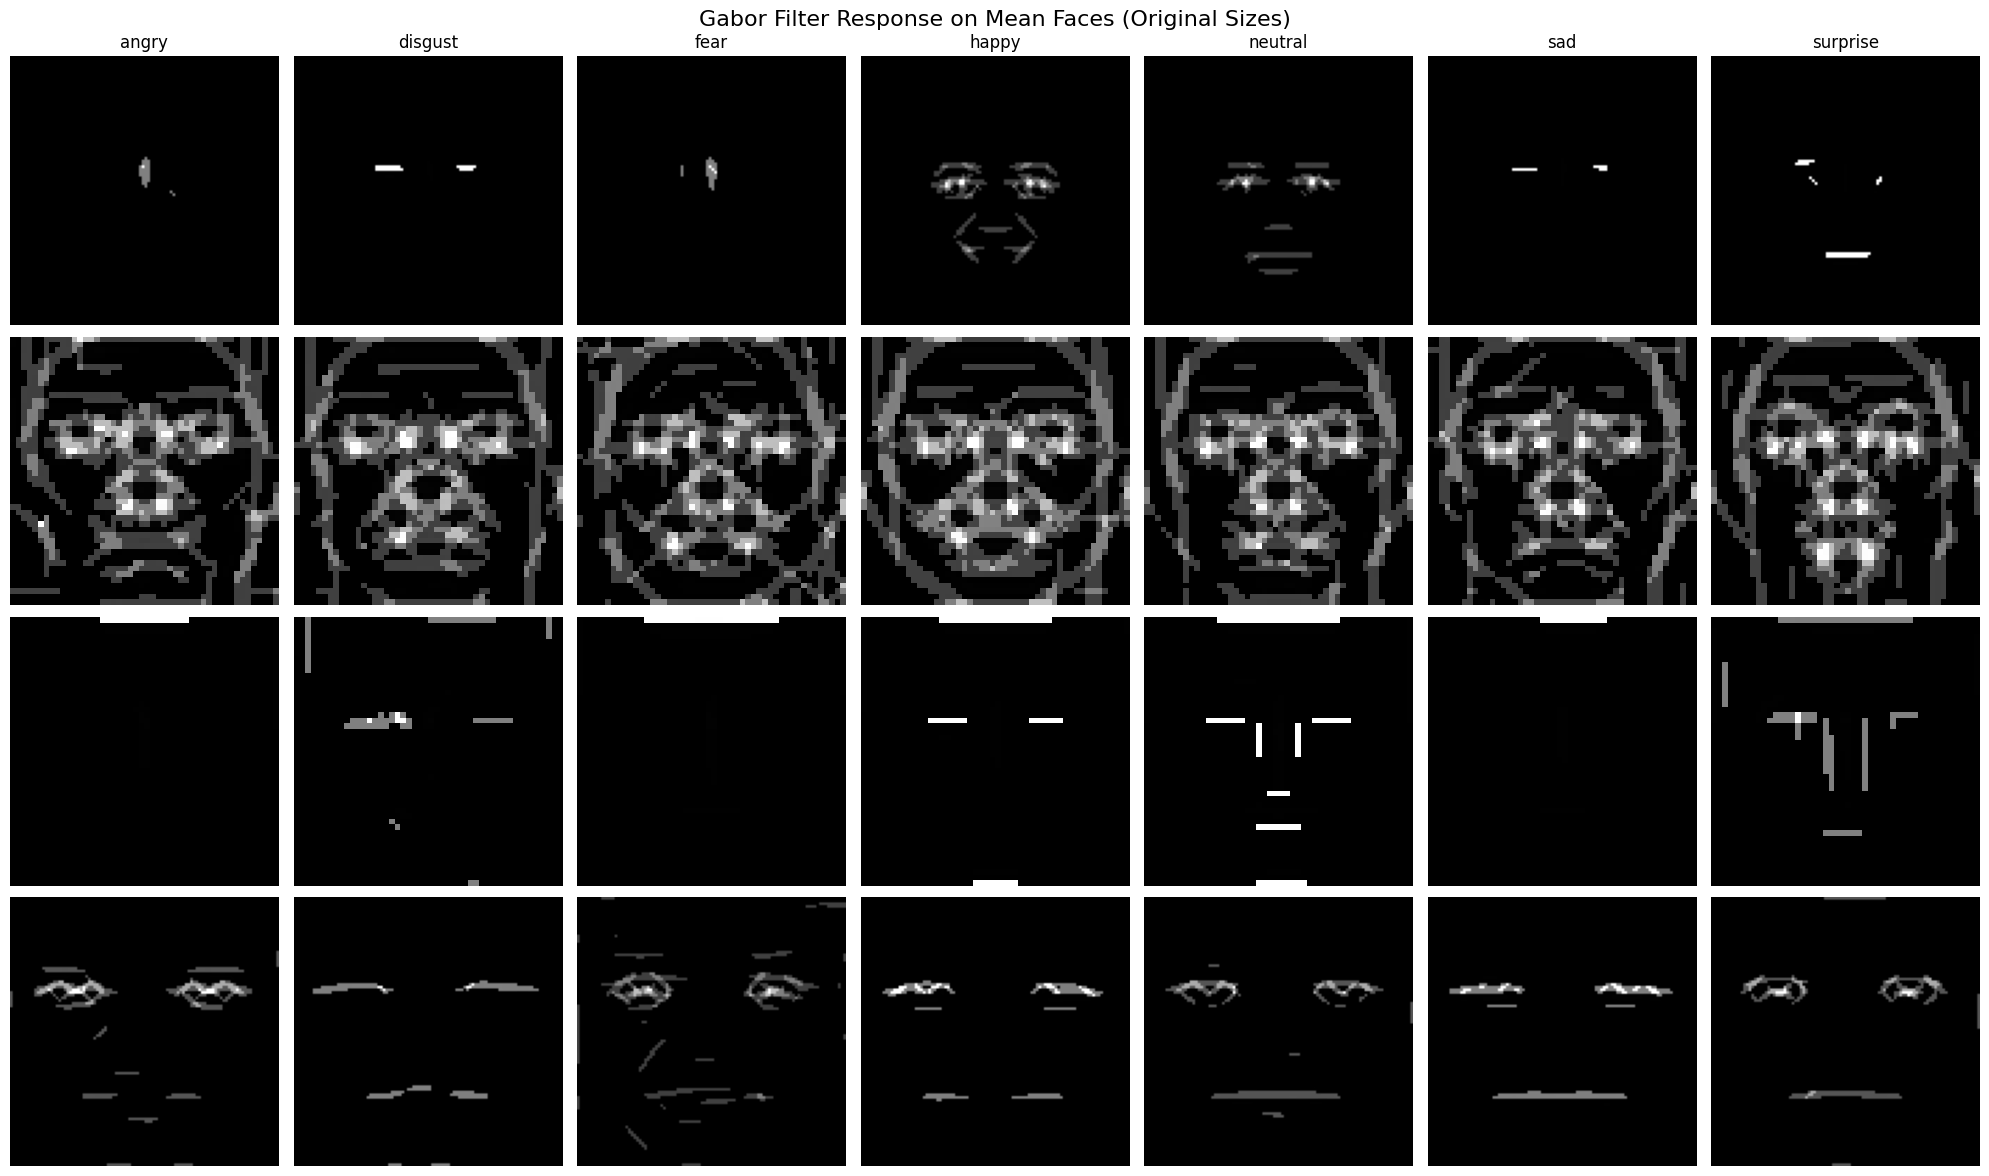

In [60]:
from skimage.filters import gabor
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def preprocess_and_gabor_mean_face(imgs, sharpen_method=None):
    """
    Preprocess images, compute mean face, apply optional sharpening, return grayscale mean face.
    Automatically determines target_size from the first image.
    
    sharpen_method: None | 'unsharp' | 'kernel' | 'highpass'
    """
    if len(imgs) == 0:
        return np.zeros((48,48), dtype=np.uint8)  # default small placeholder
    
    # Determine target size from the first image
    first_img = imgs[0]
    if len(first_img.shape) == 1:
        side = int(np.sqrt(first_img.shape[0]))
        target_size = (side, side)
    else:
        target_size = first_img.shape[:2]
    
    processed_imgs = []
    for img in imgs:
        # Convert to uint8
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
        # Reshape if flat
        if len(img.shape) == 1:
            side = int(np.sqrt(img.shape[0]))
            img = img.reshape(side, side)
        # Grayscale → RGB
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize to target size of first image
        img = cv2.resize(img, target_size)
        processed_imgs.append(img.astype(np.float32))
    
    # Compute mean face
    avg_img = np.mean(processed_imgs, axis=0)
    
    # Apply sharpening if needed
    if sharpen_method:
        if sharpen_method == 'unsharp':
            blur = cv2.GaussianBlur(avg_img, (3, 3), 0)
            avg_img = cv2.addWeighted(avg_img, 1.5, blur, -0.5, 0)
        elif sharpen_method == 'kernel':
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
            avg_img = cv2.filter2D(avg_img, -1, kernel)
        elif sharpen_method == 'highpass':
            high_pass = avg_img - cv2.GaussianBlur(avg_img, (3,3), 0)
            avg_img = cv2.add(avg_img, high_pass)
    
    # Convert mean face to grayscale
    gray_avg = cv2.cvtColor(avg_img.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    return gray_avg, target_size

# Example: plot Gabor response for mean faces per emotion per dataset
fig, axes = plt.subplots(len(datasets), len(emotions), figsize=(20,12))

for i, dataset in tqdm(enumerate(datasets)):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values
        gray_avg, target_size = preprocess_and_gabor_mean_face(imgs, sharpen_method='highpass')
        
        # Gabor filter bank
        orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        frequency = 0.2
        responses = [gabor(gray_avg, frequency=frequency, theta=theta)[0] for theta in orientations]
        gabor_response = np.sum(np.array(responses), axis=0)
        
        # Normalize
        eps = 1e-8
        gabor_response = (gabor_response - gabor_response.min()) / (gabor_response.max() - gabor_response.min() + eps)
        
        axes[i,j].imshow(gabor_response, cmap='gray')
        axes[i,j].axis('off')
        if i == 0:
            axes[i,j].set_title(emotions[j])
    axes[i,0].set_ylabel(dataset_names[i])

plt.suptitle("Gabor Filter Response on Mean Faces (Original Sizes)", fontsize=16)
plt.tight_layout()
plt.show()


4it [00:07,  1.84s/it]


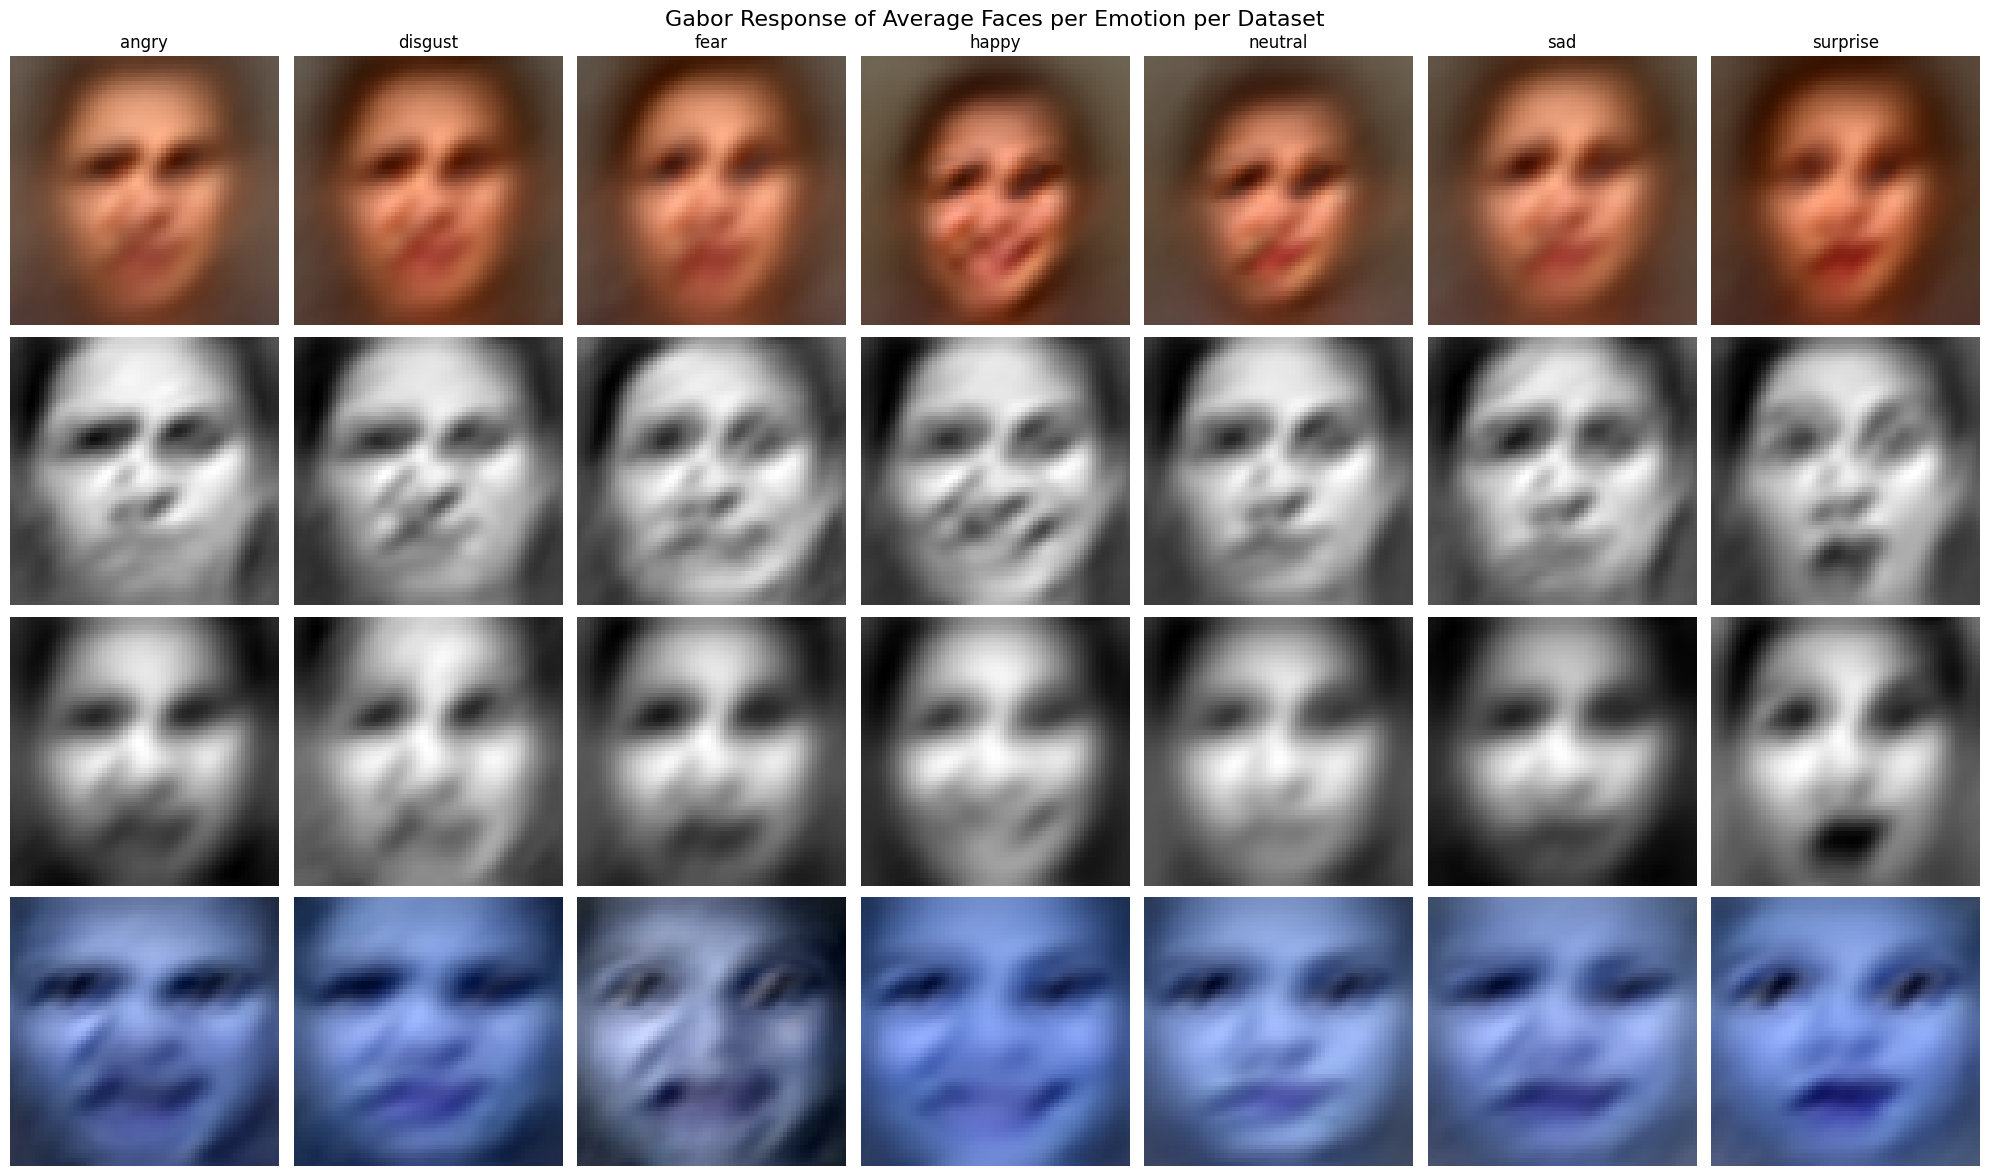

In [55]:
import cv2
import numpy as np
from tqdm import tqdm

def preprocess_and_gabor(imgs, target_size=(64,64), sharpen_method=None):
    """
    Preprocess images, compute average face, apply optional sharpening, and return for Gabor filtering.
    
    sharpen_method: None | 'unsharp' | 'kernel' | 'highpass'
    """
    processed_imgs = []
    for img in imgs:
        # Convert to uint8
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
        # Reshape if flat
        if len(img.shape) == 1:
            side = int(np.sqrt(img.shape[0]))
            img = img.reshape(side, side)
        # Grayscale → RGB
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize
        img = cv2.resize(img, target_size)
        processed_imgs.append(img.astype(np.float32))
    
    if not processed_imgs:
        return np.zeros((target_size[0], target_size[1], 3), dtype=np.float32)
    
    avg_img = np.mean(processed_imgs, axis=0)
    
    # Apply sharpening
    if sharpen_method:
        if sharpen_method == 'unsharp':
            blur = cv2.GaussianBlur(avg_img, (3, 3), 0)
            avg_img = cv2.addWeighted(avg_img, 1.5, blur, -0.5, 0)
        elif sharpen_method == 'kernel':
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
            avg_img = cv2.filter2D(avg_img, -1, kernel)
        elif sharpen_method == 'highpass':
            high_pass = avg_img - cv2.GaussianBlur(avg_img, (3,3), 0)
            avg_img = cv2.add(avg_img, high_pass)
    
    # Normalize to 0-255
    avg_img = (avg_img - avg_img.min()) / (avg_img.max() - avg_img.min()) * 255
    avg_img = avg_img.astype(np.uint8)
    
    return avg_img

# Example usage: Gabor responses for each dataset and emotion
fig, axes = plt.subplots(len(datasets), len(emotions), figsize=(20,12))

for i, dataset in tqdm(enumerate(datasets)):
    for j, emotion in enumerate(emotions):
        imgs = dataset[dataset['label'] == emotion]['pixels'].values
        avg_img = preprocess_and_gabor(imgs, target_size=(64,64), sharpen_method='kernel')
        
        # Compute Gabor filter response
        gabor_kernel = cv2.getGaborKernel(ksize=(9,9), sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)
        gabor_response = cv2.filter2D(avg_img, cv2.CV_32F, gabor_kernel)
        
        # Normalize Gabor for visualization
        gabor_response = (gabor_response - gabor_response.min()) / (gabor_response.max() - gabor_response.min() + 1e-8)
        
        axes[i,j].imshow(gabor_response, cmap='gray')
        axes[i,j].axis('off')
        if i == 0:
            axes[i,j].set_title(emotion)
    axes[i,0].set_ylabel(dataset_names[i])

plt.suptitle("Gabor Response of Average Faces per Emotion per Dataset", fontsize=16)
plt.tight_layout()
plt.show()


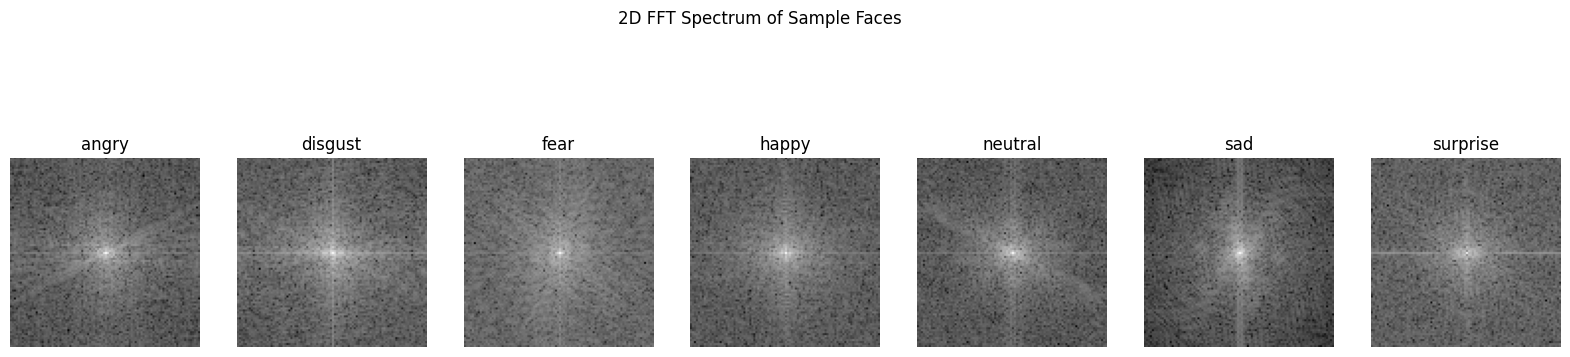

In [42]:
def plot_fft_image(img, ax):
    # Ensure grayscale for FFT
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)  # center the spectrum
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    
    ax.imshow(magnitude_spectrum, cmap='gray')
    ax.axis("off")

# Example: plot average FFT per emotion
fig, axes = plt.subplots(1, 7, figsize=(20,5))
for j, emotion in enumerate(emotions):
    img = all_data[all_data['label']==emotion]['pixels'].values[0]
    if img.ndim == 1:
        img = img.reshape(48,48)
    plot_fft_image(img, axes[j])
    axes[j].set_title(emotion)
plt.suptitle("2D FFT Spectrum of Sample Faces")
plt.show()


In [41]:
from sklearn.manifold import TSNE
from tensorflow.keras.applications import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import seaborn as sns

# load pretrained ResNet50 without top
resnet = ResNet50(weights="imagenet", include_top=False, pooling="avg")

# sample a subset for speed
sampled = all_data.groupby('label').apply(lambda x: x.sample(min(200, len(x)))).reset_index(drop=True)

# preprocess images
X = []
y = []
for _, row in sampled.iterrows():
    img = row['pixels']
    if len(img.shape) == 1:
        side = int(np.sqrt(img.shape[0]))
        img = img.reshape(side, side)
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (224, 224))
    X.append(img_to_array(img))
    y.append(row['label'])

X = np.array(X)
X = preprocess_input(X)

# extract embeddings
embeddings = resnet.predict(X, verbose=1)

# reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(embeddings)

# plot
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette="tab10", alpha=0.7)
plt.title("t-SNE of Emotion Embeddings (ResNet50)")
plt.show()


2025-09-04 15:16:44.749966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'preprocess_input' from 'tensorflow.keras.applications' (/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/keras/api/_v2/keras/applications/__init__.py)

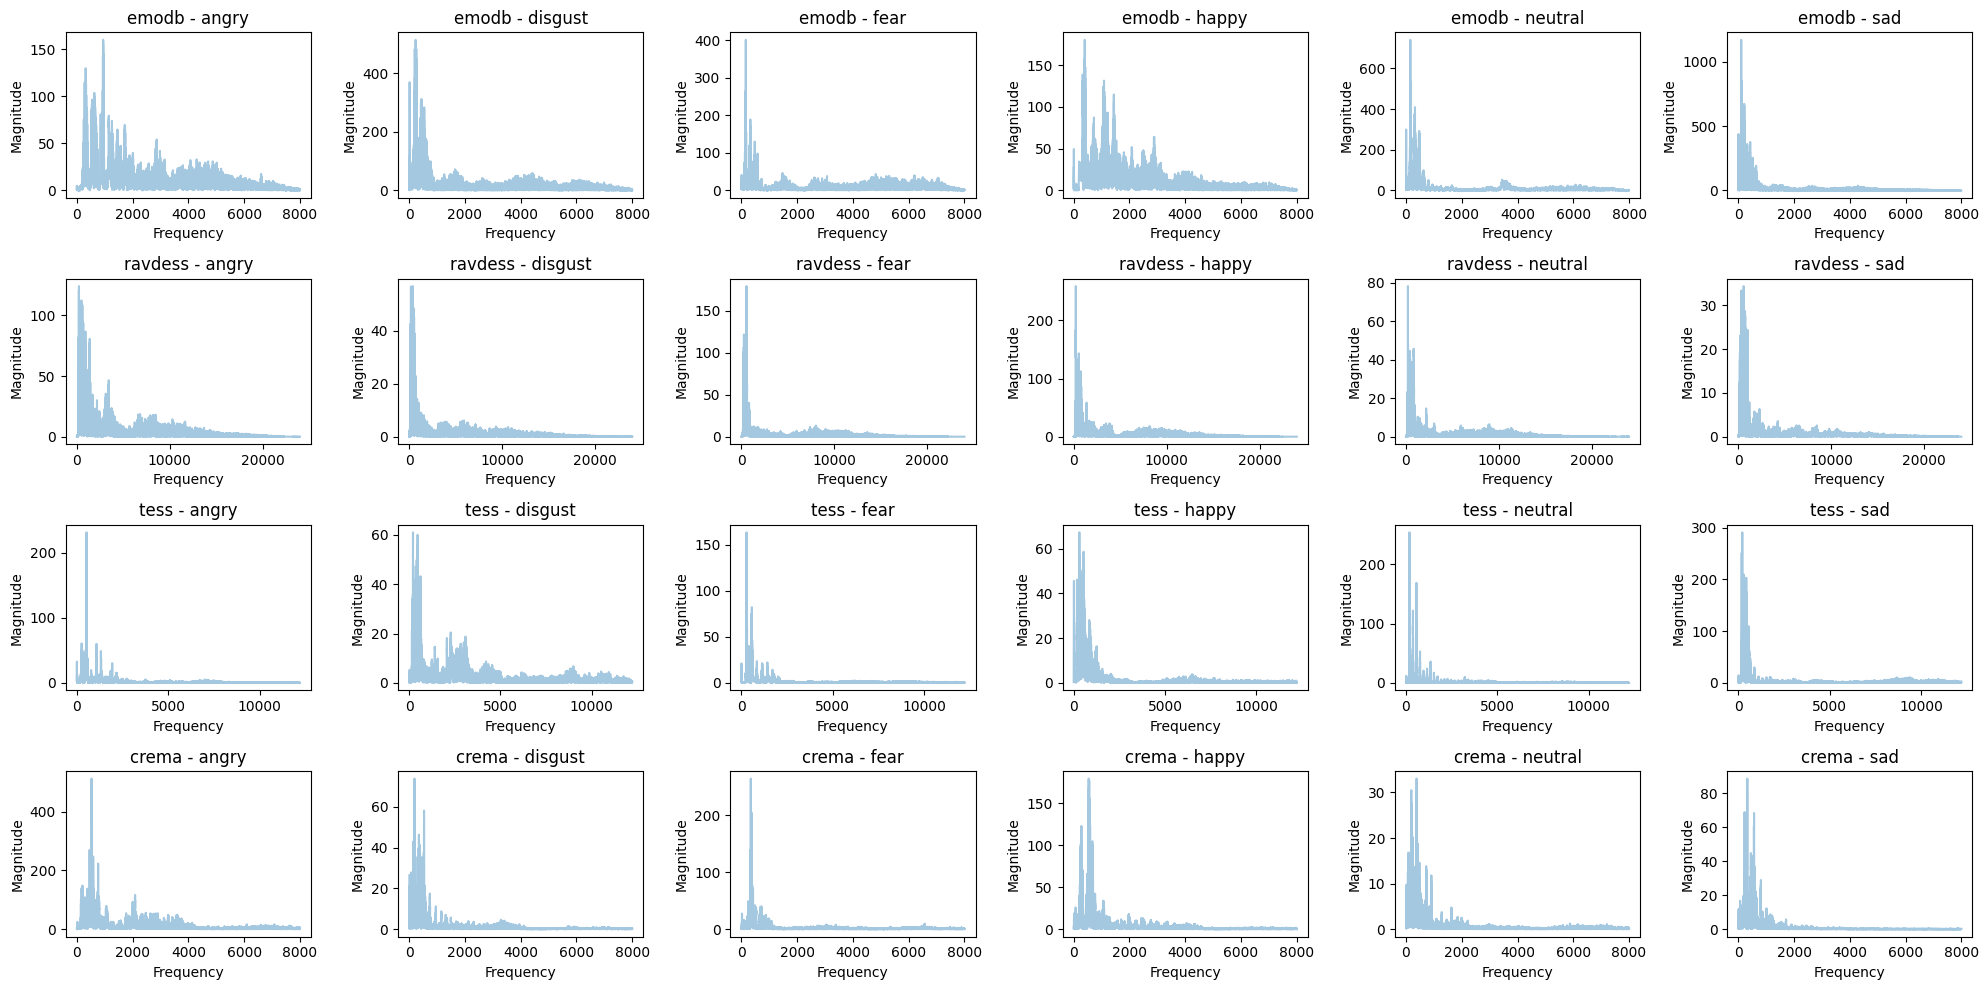

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_embeddings(dataset, emotion, n=200):
    imgs = dataset[dataset['label'] == emotion].sample(min(n, len(dataset[dataset['label'] == emotion])))['pixels'].values
    processed = []
    for img in imgs:
        if len(img.shape) == 1:
            side = int(np.sqrt(img.shape[0]))
            img = img.reshape(side, side)
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, (224, 224))
        processed.append(img_to_array(img))
    X = preprocess_input(np.array(processed))
    return resnet.predict(X, verbose=0)

# example: compare "happy" FER vs RAF
emb_fer = get_embeddings(fer, "happy")
emb_raf = get_embeddings(raf, "happy")

# cosine similarity
sim_matrix = cosine_similarity(emb_fer, emb_raf)
print("Mean similarity FER vs RAF (happy):", sim_matrix.mean())

# visualize distribution
plt.hist(sim_matrix.flatten(), bins=30, alpha=0.7, color="blue")
plt.title("Cosine Similarity between FER and RAF 'happy'")
plt.xlabel("Cosine similarity")
plt.ylabel("Frequency")
plt.show()


/var/folders/0s/lm29041s6hv5pq_lc3jblq540000gn/T/ipykernel_75860/3893080447.py:10: RuntimeWarning: divide by zero encountered in log
  S = np.log(np.abs(librosa.stft(y)))


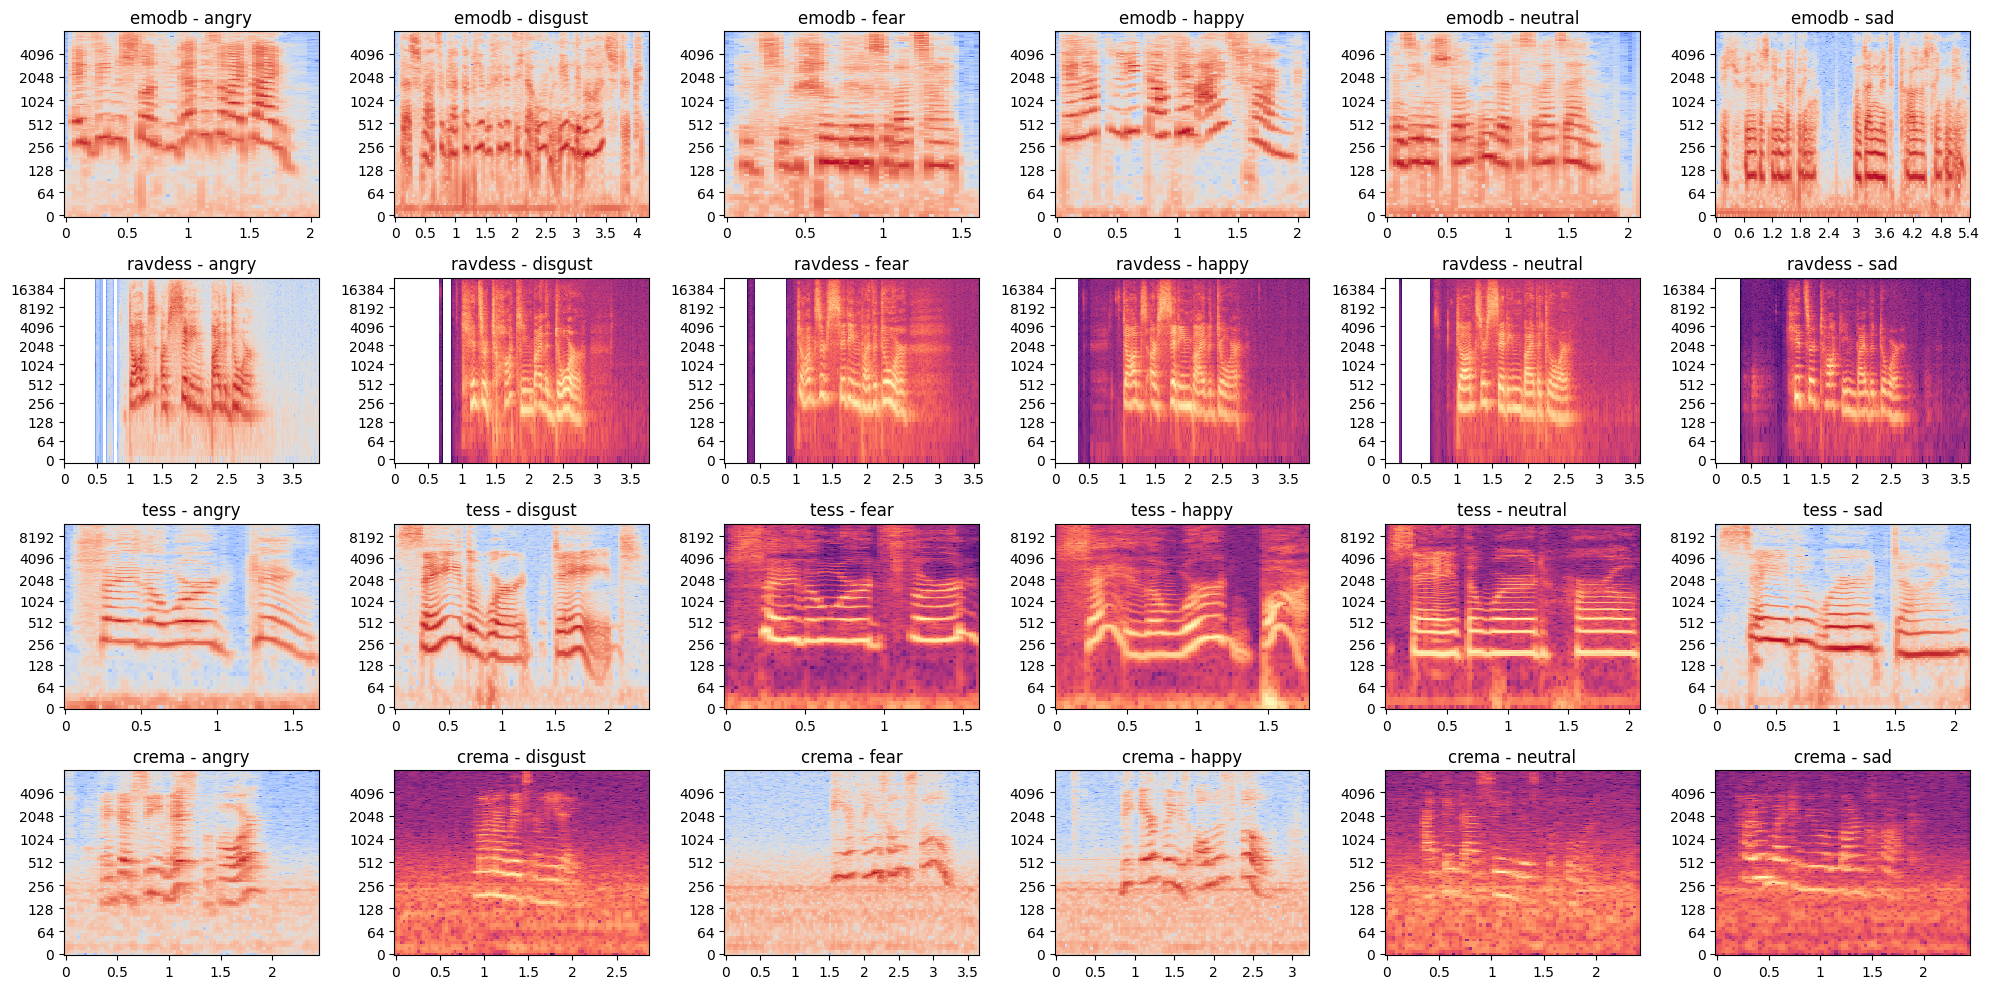

In [27]:

# plot short fourier transform for each emotion for each dataset (4 rows, 6 columns), dont need imports, based on above
fig, axs = plt.subplots(4, 6, figsize=(20, 10))
for i, dataset in enumerate([emodb, ravdess, tess, crema]): 
    for j, emotion in enumerate(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']):#, 'surprise']):
        # get the first sample of the emotion
        sample = dataset[dataset['label'] == emotion].iloc[0]
        # load the audio file
        y, sr = librosa.load(sample['filename'], sr=None)
        # compute stft
        S = np.log(np.abs(librosa.stft(y)))
        S_resized = np.resize(S, (128, 256))
        # plot the stft
        img = librosa.display.specshow(S, x_axis='time', y_axis='log', sr=sr, ax=axs[i, j])
        axs[i, j].set_title(f'{dataset["dataset"].iloc[0]} - {emotion}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('stft-log-resized.png')
plt.show()


In [8]:
y, _ = librosa.load(emodb.iloc[0]['filename'], sr=None)
S = librosa.feature.melspectrogram(y=y, sr=_, n_mels=128)
S.shape

(128, 65)

In [ ]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# -----------------------------
# CNN model definition
# -----------------------------
class AudioCNN(tf.keras.Model):
    def __init__(self, input_shape=(128, 256, 1), n_classes=6): # input_shape=(128, 256, 1)
        super(AudioCNN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=input_shape)
        self.pool1 = tf.keras.layers.MaxPooling2D((2,2))
        self.conv2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')
        self.pool2 = tf.keras.layers.MaxPooling2D((2,2))
        self.conv3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')
        self.pool3 = tf.keras.layers.MaxPooling2D((2,2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.fc = tf.keras.layers.Dense(n_classes, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# -----------------------------
# Dataset preparation
# -----------------------------
def prepare_dataset(df, sr=16000, n_mels=128, resize_shape=(128, 256)):
    """
    df: DataFrame with 'filename' and 'label' columns
    sr: sampling rate
    n_mels: number of STFT bins (frequency axis)
    resize_shape: (height, width) of STFT images for CNN
    """
    # Encode labels
    le = LabelEncoder()
    df['label_enc'] = le.fit_transform(df['label'])
    labels = df['label_enc'].values
    n_classes = len(le.classes_)

    stft_list = []
    for fname in df['filename']:
        y, _ = librosa.load(fname, sr=sr)
        #S = np.abs(librosa.stft(y))
        #S_db = np.log1p(S)  # log-scale
        # Resize to fixed shape
        #S_resized = np.resize(S_db, resize_shape)
        # compute spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)#len(y)//512)#128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        S_resized = np.resize(S_dB, (128, 256))
        # Add channel dimension
        S_resized = S_resized[..., np.newaxis]
        stft_list.append(S_resized)

    X = np.array(stft_list, dtype=np.float32)
    y = tf.keras.utils.to_categorical(labels, num_classes=n_classes)

    return X, y, n_classes

# -----------------------------
# Example usage
# -----------------------------
# Suppose you have DataFrames: train_df, valid_df
# train_df = pd.read_csv('train.csv')
# valid_df = pd.read_csv('valid.csv')

# Prepare datasets
X_train, y_train, n_classes = prepare_dataset(pd.concat([emodb,tess,crema,ravdess]))
X_valid, y_valid, _ = prepare_dataset(iemocap)

# Create model
cnn_model = AudioCNN(input_shape=X_train.shape[1:], n_classes=n_classes)
#cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 30
# Create an Adam optimizer with a decay rate
initial_learning_rate = 0.001
decay_rate = initial_learning_rate / epochs

# To use an ExponentialDecay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=X_train.shape[0] / 16, # number of steps per epoch
    decay_rate=0.96,
    staircase=True)

# Compile the model with the customized optimizer
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Train
cnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
              batch_size=16, epochs=30)

# Predict on a single file
def predict_file(fname):
    y, _ = librosa.load(fname, sr=16000)
    S = np.abs(librosa.stft(y))
    S_db = np.log1p(S)
    S_resized = np.resize(S_db, (128,256))[..., np.newaxis]
    X = np.expand_dims(S_resized, axis=0)
    pred = cnn_model.predict(X)
    label_idx = np.argmax(pred, axis=1)[0]
    return label_idx

# Example:
# label_pred = predict_file('audio_example.wav')
# print("Predicted label index:", label_pred)


Epoch 1/30
747/747 [==============================] - 146s 192ms/step - loss: 2.4400 - accuracy: 0.2204 - val_loss: 1.8522 - val_accuracy: 0.2757
Epoch 2/30
747/747 [==============================] - 162s 217ms/step - loss: 1.6181 - accuracy: 0.3516 - val_loss: 1.8829 - val_accuracy: 0.2942
Epoch 3/30
747/747 [==============================] - 148s 198ms/step - loss: 1.5329 - accuracy: 0.3966 - val_loss: 1.9339 - val_accuracy: 0.2479
Epoch 4/30
747/747 [==============================] - 146s 195ms/step - loss: 1.4310 - accuracy: 0.4443 - val_loss: 2.1517 - val_accuracy: 0.2919
Epoch 5/30
747/747 [==============================] - 141s 189ms/step - loss: 1.3449 - accuracy: 0.4699 - val_loss: 2.0329 - val_accuracy: 0.2337
Epoch 6/30
747/747 [==============================] - 149s 199ms/step - loss: 1.2780 - accuracy: 0.4972 - val_loss: 2.1596 - val_accuracy: 0.2509
Epoch 7/30
747/747 [==============================] - 164s 220ms/step - loss: 1.2058 - accuracy: 0.5259 - val_loss: 2.3256 -

In [31]:
# Prepare datasets
X_train, y_train, n_classes = prepare_dataset(tess)
X_valid, y_valid, _ = prepare_dataset(ravdess)

# Create model
cnn_model = AudioCNN(input_shape=X_train.shape[1:], n_classes=n_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
cnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
              batch_size=16, epochs=30)

Epoch 1/30
175/175 [==============================] - 36s 198ms/step - loss: 0.8097 - accuracy: 0.7146 - val_loss: 3.9944 - val_accuracy: 0.1835
Epoch 2/30
175/175 [==============================] - 34s 192ms/step - loss: 0.2215 - accuracy: 0.9293 - val_loss: 4.3068 - val_accuracy: 0.2011
Epoch 3/30
175/175 [==============================] - 33s 188ms/step - loss: 0.0957 - accuracy: 0.9693 - val_loss: 4.3770 - val_accuracy: 0.2171
Epoch 4/30
175/175 [==============================] - 33s 191ms/step - loss: 0.0467 - accuracy: 0.9846 - val_loss: 5.3707 - val_accuracy: 0.2171
Epoch 5/30
175/175 [==============================] - 33s 188ms/step - loss: 0.0231 - accuracy: 0.9950 - val_loss: 7.7945 - val_accuracy: 0.2300
Epoch 6/30
175/175 [==============================] - 33s 189ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 6.9457 - val_accuracy: 0.2139
Epoch 7/30
175/175 [==============================] - 33s 189ms/step - loss: 0.0307 - accuracy: 0.9882 - val_loss: 7.2597 - val_ac

KeyboardInterrupt: 